# Oscilador Arminico
Solución Numérica

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb

/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
sb.set_style('white')

Definimos la forma funcional de la ecución a solucionar 

$$\ddot{x}+\frac{k}{m}x = 0$$

Y la escribimos como un conjunto de edo's de primer orde, tal que:

$$\dot{v} + \frac{k}{m}x = 0$$
$$\dot{x} = v(x)$$

# Método de Euler

In [3]:
def S2_ode(fun, init_c, consts, steps, h):
        x0, v0, t0 = init_c
        c1,c2 = consts
        
        x = np.zeros(steps+1)
        v = np.zeros(steps+1)
        t = np.zeros(steps+1)
        
        #apply initial conditions
        x[0] = x0
        v[0] = v0
        t[0] = t0
        
        for i in range(steps):
            x[i+1] = x[i] + h * v[i] 
            v[i+1] = v[i] + h * fun(x[i],c1,c2)
            t[i+1]  =t[i] + h 
        
        return x, v, t 

In [4]:
def equation(z,k,m):
    omega = np.sqrt(k/m)
    return -(omega**2)*z

In [5]:
k1 = 2.
m1 = 1.
omega1 = np.sqrt(k1/m1)

In [6]:
pos, vel, time = S2_ode(equation,(0.0,2.,0.),(k1,m1),3000,1e-2)

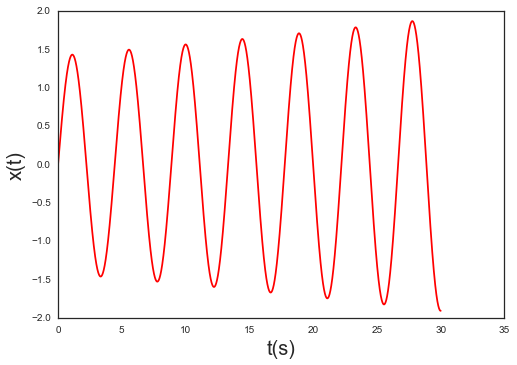

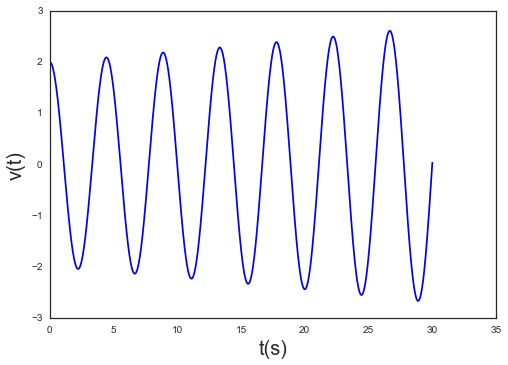

In [25]:
plt.figure()
plt.plot(time,pos,'r');
plt.xlabel('t(s)',fontsize=20)
plt.ylabel('x(t)',fontsize=20)
plt.figure()
plt.plot(time,vel,'b');
plt.xlabel('t(s)',fontsize=20)
plt.ylabel('v(t)',fontsize=20)

Para probar si nuestro método de integracion esta haciendo las cosas bien podemos calcular la energía total de nuestro sistema para observar si esta se conserva

In [8]:
energy = lambda val1,val2: 0.5*m1*val1**2 + 0.5*(k1)*(val2**2)

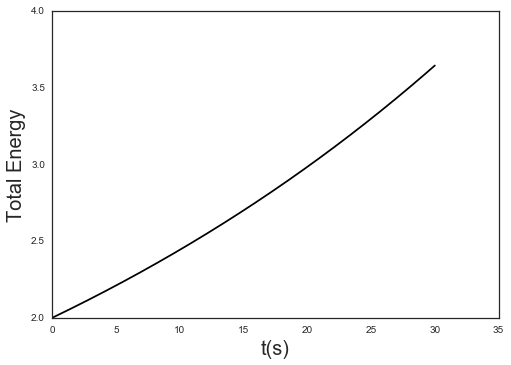

In [26]:
ener1 = energy(vel,pos)
plt.plot(time,ener1,'k');
plt.xlabel('t(s)', fontsize=20)
plt.ylabel('Total Energy', fontsize=20)

# Método Runge-Kutta

In [10]:
def RK4(fun,init_c,const,steps,h):
    x0, v0, t0 = init_c
    c1,c2 = const

    
    x = np.zeros(steps+1)
    v = np.zeros(steps+1)
    t = np.zeros(steps+1)
        
    #apply initial conditions
    x[0] = x0
    v[0] = v0
    t[0] = t0
    
    for i in range(steps):
        
        kx1=h*v[i]
        kv1=h*fun(x[i],c1,c2)
        
        kx2=h*(v[i]+0.5*kv1)
        kv2=h*fun(x[i]+0.5*kx1,c1,c2)
        
        kx3=h*(v[i]+0.5*kv2)
        kv3=h*fun(x[i]+0.5*kx2,c1,c2)
        
        kx4=h*(v[i]+kv3)
        kv4=h*fun(x[i]+kx3,c1,c2)
        
        x[i+1] = x[i]+(kx1+2.0*kx2+2.0*kx3+kx4)/6.0
        v[i+1] = v[i]+(kv1+2.0*kv2+2.0*kv3+kv4)/6.0
        
        t[i+1] = t[i] + h
        
    return x, v, t


In [11]:
pos1, vel1, time1 = RK4(equation,(0.0,2.,0.),(k1,m1),3000,1e-2)

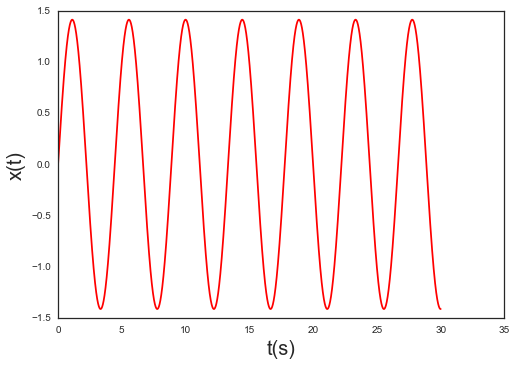

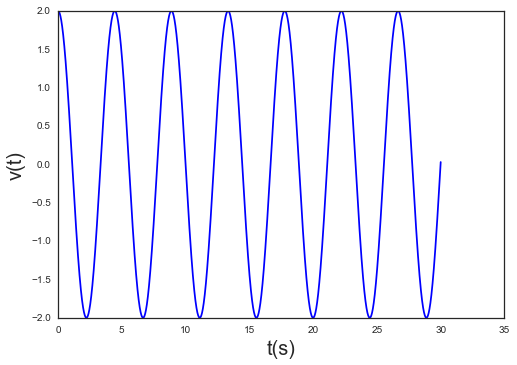

In [18]:
plt.figure()
plt.plot(time1,pos1,'r');
plt.xlabel('t(s)',fontsize=20)
plt.ylabel('x(t)',fontsize=20)
plt.figure()
plt.plot(time1,vel1,'b');
plt.xlabel('t(s)', fontsize=20)
plt.ylabel('v(t)', fontsize=20)

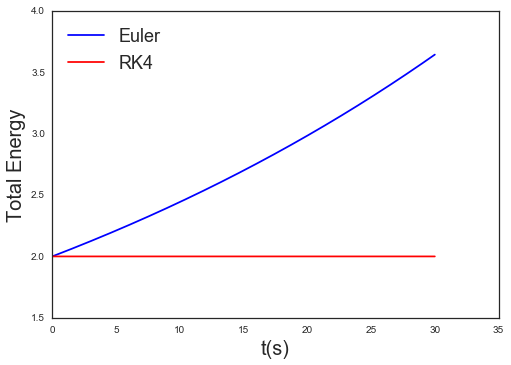

In [23]:
plt.figure()
plt.plot(time,ener1,'b',label='Euler')
plt.plot(time1,ener2,'r',label='RK4')
plt.legend(loc='best',fontsize=18)
plt.xlabel('t(s)', fontsize=20)
plt.ylabel('Total Energy', fontsize=20)

Ahora, aplicar esta metodología para un oscilador amortiguado de la forma

$$m\ddot{x}+\beta\dot{x}+kx=0$$